# "[NeuralNetwork] Reinforcement learning - Q-Learning"
> KNU AIR week3

- toc: false
- badges: false
- comments: false
- categories: [reinforcement learining]
- hide_{github,colab,binder,deepnote}_badge: true

__Content creators:__ 조동현

__Content reviewers:__ 

# 1. Overview

## Q-Learning 이란?
- 유한 마르코프 결정에서 최적의 정책을 찾기 위해 사용
- 주어진 상태에서 주어진 행동을 수행하는 것에 대한 기대값을 예측하는 함수인 Q 함수를 학습

-------------

# 2.Example

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
           'is_slippery':False}
)

env = gym.make('FrozenLake-v3')

/home/yang/.local/lib/python3.8/site-packages/gym/envs/registration.py:595: UserWarning: WARN: Overriding environment FrozenLake-v3
  logger.warn(f"Overriding environment {id}")


In [7]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
dis = 0.99
num_episodes = 2000
rList = []

In [8]:
for i in range(num_episodes) : 
    state = env.reset()
    rAll = 0
    done = False
    
    while not done :
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        rAll += reward
        state = new_state
        
    rList.append(rAll)

In [9]:
for i in range(num_episodes) : 
    state = env.reset()
    rAll = 0
    done = False
    
    e = 1./((i / 100) + 1)
    while not done : 
        if np.random.rand(1) < e :
            action = env.action_space.sample()
        else : 
            action = np.argmax(Q[state, :])
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate : 1.741
Final Q-Table Values
[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.92274469 0.93206535]
 [0.93206535 0.         0.91351725 0.92274469]
 [0.92274469 0.         0.         0.91351725]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.92274469]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


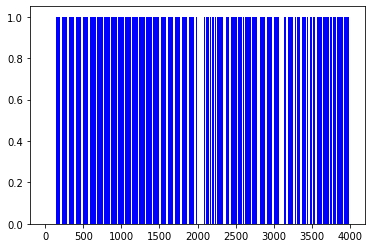

In [11]:
print("Success rate : "+str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)

plt.bar(range(len(rList)), rList, color="blue")
plt.show()